In [1]:
# Load the "autoreload" extension
#%load_ext autoreload

#reload extension
%reload_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 2

#Import all the necessary packages for modules
import os
import sys

#add the 'python' directory as one where we can import modules
py_dir = os.path.join(os.getcwd(), 'python')
sys.path.append(py_dir)

# import my method from the source code
from python.get_info import plot_hists, plot_violin

In [2]:
#Import all necessary packages for visualization and transformation of the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# PRE-PROCESSING

In [121]:
#upload training set and change dtypes for visitor_id and label to a categorical object
train = pd.read_csv('data/train_20170701_to_20170731', index_col=0, dtype={'visitor_id': 'object'})
train.head()

visitor_id  day0_time_on_site_seconds  day1_time_on_site_seconds  \
0  3092487309701391768                      570.0                        NaN   
1   780253600713375371                      705.0                        NaN   
2   953713676730854570                      373.0                        NaN   
3   238925310298938861                     1919.0                        NaN   
4  1090774782213816251                     2405.0                        NaN   

   day2_time_on_site_seconds  day3_time_on_site_seconds  \
0                     1021.0                        NaN   
1                        NaN                        NaN   
2                        NaN                        NaN   
3                        NaN                        NaN   
4                        NaN                        NaN   

   day4_6_time_on_site_seconds  w2_time_on_site_seconds  day0_hits  day1_hits  \
0                          NaN                    533.0       26.0        NaN   
1                          NaN                   1181.0       58.0        NaN   
2                          NaN                    736.0       42.0        NaN   
3                         14.0                    691.0       74.0        NaN   
4                          0.0                    454.0       33.0        NaN   

   day2_hits  ...  day3_sessions  day4_6_sessions  w2_sessions  \
0        6.0  ...            NaN              NaN          2.0   
1        NaN  ...            NaN              NaN          1.0   
2        NaN  ...            NaN              NaN          1.0   
3        NaN  ...            NaN              1.0          2.0   
4        NaN  ...            NaN              1.0          2.0   

   day0_session_quality  day1_session_quality  day2_session_quality  \
0                  60.0                   NaN                   3.0   
1                  85.0                   NaN                   NaN   
2                  76.0                   NaN                   NaN   
3                  79.0                   NaN                   NaN   
4                  87.0                   NaN                   NaN   

   day3_session_quality  day4_6_session_quality  w2_session_quality  label  
0                   NaN                     NaN                 1.5      1  
1                   NaN                     NaN                79.0      1  
2                   NaN                     NaN                65.0      1  
3                   NaN                     1.0                43.5      1  
4                   NaN                     1.0                 3.0      1  

[5 rows x 38 columns]

In [4]:
train.label.value_counts()/len(train.label)

0    0.951713
1    0.048287
Name: label, dtype: float64

In [5]:
train[train.label==1].describe().T[['mean', '50%']]

mean       50%
day0_time_on_site_seconds    1348.949170  1003.500
day1_time_on_site_seconds     944.803571   433.000
day2_time_on_site_seconds     628.696429   235.500
day3_time_on_site_seconds     752.333333   359.000
day4_6_time_on_site_seconds   628.965517   203.500
w2_time_on_site_seconds       512.436620   301.000
day0_hits                      38.738589    31.000
day1_hits                      20.767857    12.000
day2_hits                      15.375000     9.000
day3_hits                      17.025641     7.000
day4_6_hits                    13.568966     9.000
w2_hits                        14.352113     9.000
day0_pageViews                 29.873444    25.000
day1_pageViews                 15.339286    10.000
day2_pageViews                 12.017857     8.000
day3_pageViews                 13.051282     6.000
day4_6_pageViews               10.896552     8.000
w2_pageViews                   11.239437     7.000
day0_bounces                    0.079876     0.000
day1_bounces                    0.276786     0.000
day2_bounces                    0.178571     0.000
day3_bounces                    0.435897     0.000
day4_6_bounces                  0.293103     0.000
w2_bounces                      0.239437     0.000
day0_sessions                   1.405602     1.000
day1_sessions                   1.455357     1.000
day2_sessions                   1.357143     1.000
day3_sessions                   1.435897     1.000
day4_6_sessions                 1.379310     1.000
w2_sessions                     1.211268     1.000
day0_session_quality           54.885830    57.585
day1_session_quality           21.120536     3.500
day2_session_quality           18.378571     2.750
day3_session_quality           21.929744     2.000
day4_6_session_quality         12.301552     2.750
w2_session_quality             23.572817     5.000
label                           1.000000     1.000

In [6]:
train[train.label==0].describe().T[['mean', '50%']]

mean  50%
day0_time_on_site_seconds    133.321342  0.0
day1_time_on_site_seconds    156.925595  0.0
day2_time_on_site_seconds    128.772245  0.0
day3_time_on_site_seconds    141.320096  0.0
day4_6_time_on_site_seconds  141.426524  0.0
w2_time_on_site_seconds      146.747648  0.0
day0_hits                      4.114493  2.0
day1_hits                      4.509673  2.0
day2_hits                      4.246939  1.0
day3_hits                      4.401925  2.0
day4_6_hits                    4.365203  2.0
w2_hits                        4.399865  2.0
day0_pageViews                 3.493255  2.0
day1_pageViews                 3.841890  2.0
day2_pageViews                 3.594694  1.0
day3_pageViews                 3.703169  2.0
day4_6_pageViews               3.724057  2.0
w2_pageViews                   3.747272  2.0
day0_bounces                   0.576963  1.0
day1_bounces                   0.570312  1.0
day2_bounces                   0.584082  1.0
day3_bounces                   0.563578  1.0
day4_6_bounces                 0.576742  1.0
w2_bounces                     0.584481  1.0
day0_sessions                  1.108959  1.0
day1_sessions                  1.107887  1.0
day2_sessions                  1.098776  1.0
day3_sessions                  1.081428  1.0
day4_6_sessions                1.104499  1.0
w2_sessions                    1.097765  1.0
day0_session_quality           2.581249  1.0
day1_session_quality           2.974687  1.0
day2_session_quality           2.291306  1.0
day3_session_quality           2.484757  1.0
day4_6_session_quality         2.200089  1.0
w2_session_quality             1.761164  1.0
label                          0.000000  0.0

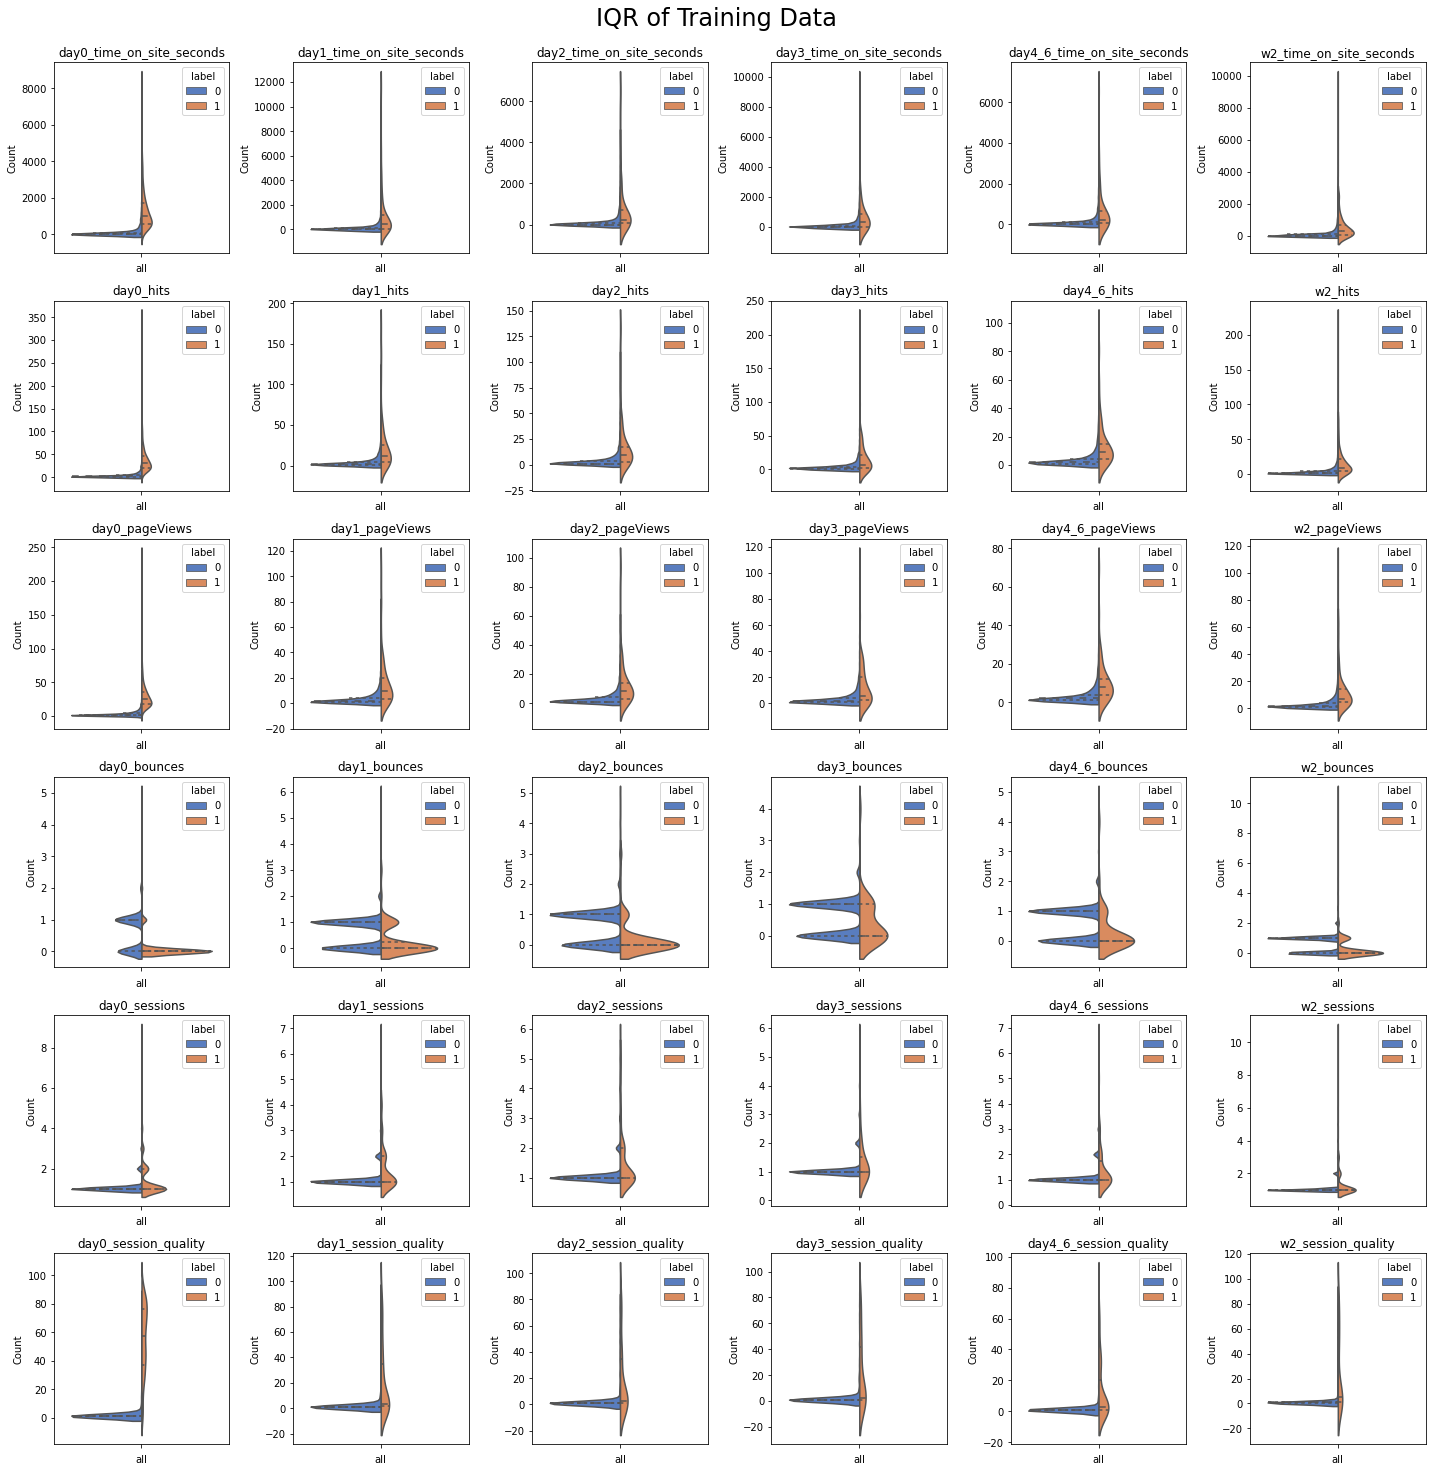

In [7]:
#create blank column to plot violin boxplot
train['all']=''

#plot violin boxplot
plot_violin(train, 'IQR of Training Data')

#remove blank column
train = train.iloc[:,:-1]

Looking at a preview of the data once again and at the percentage of customers who don't purchase (label 0) vs. customers who do purchase (label 1), we can see that customers who make a purchase make up less than 5% of the dataset. In other words, the data is highly imbalanced and customers making a purchase is considered a rare event. The violin boxplot also shows that there are significant outliers in the data.

We will perform each the following pre-processing techniques to mitigate any biases and inaccuracies in predicting customer propensity:

- No Change (Control)
- Log Transformation
- Scaling (Standardization)

We will be doing each technique separately to see which works best.

### LOG-TRANSFORM

In [8]:
train_log = train.iloc[:,1:]
train_log = (train_log+1).transform(np.log)
#Negative Values Handling
#Note that the values are different
train_log = (train_log-train_log.min()+1).transform(np.log)
train_log.insert(0, 'visitor_id', train.visitor_id)
train_log['label'] = train['label']

Let's check to see what the data looks like now.

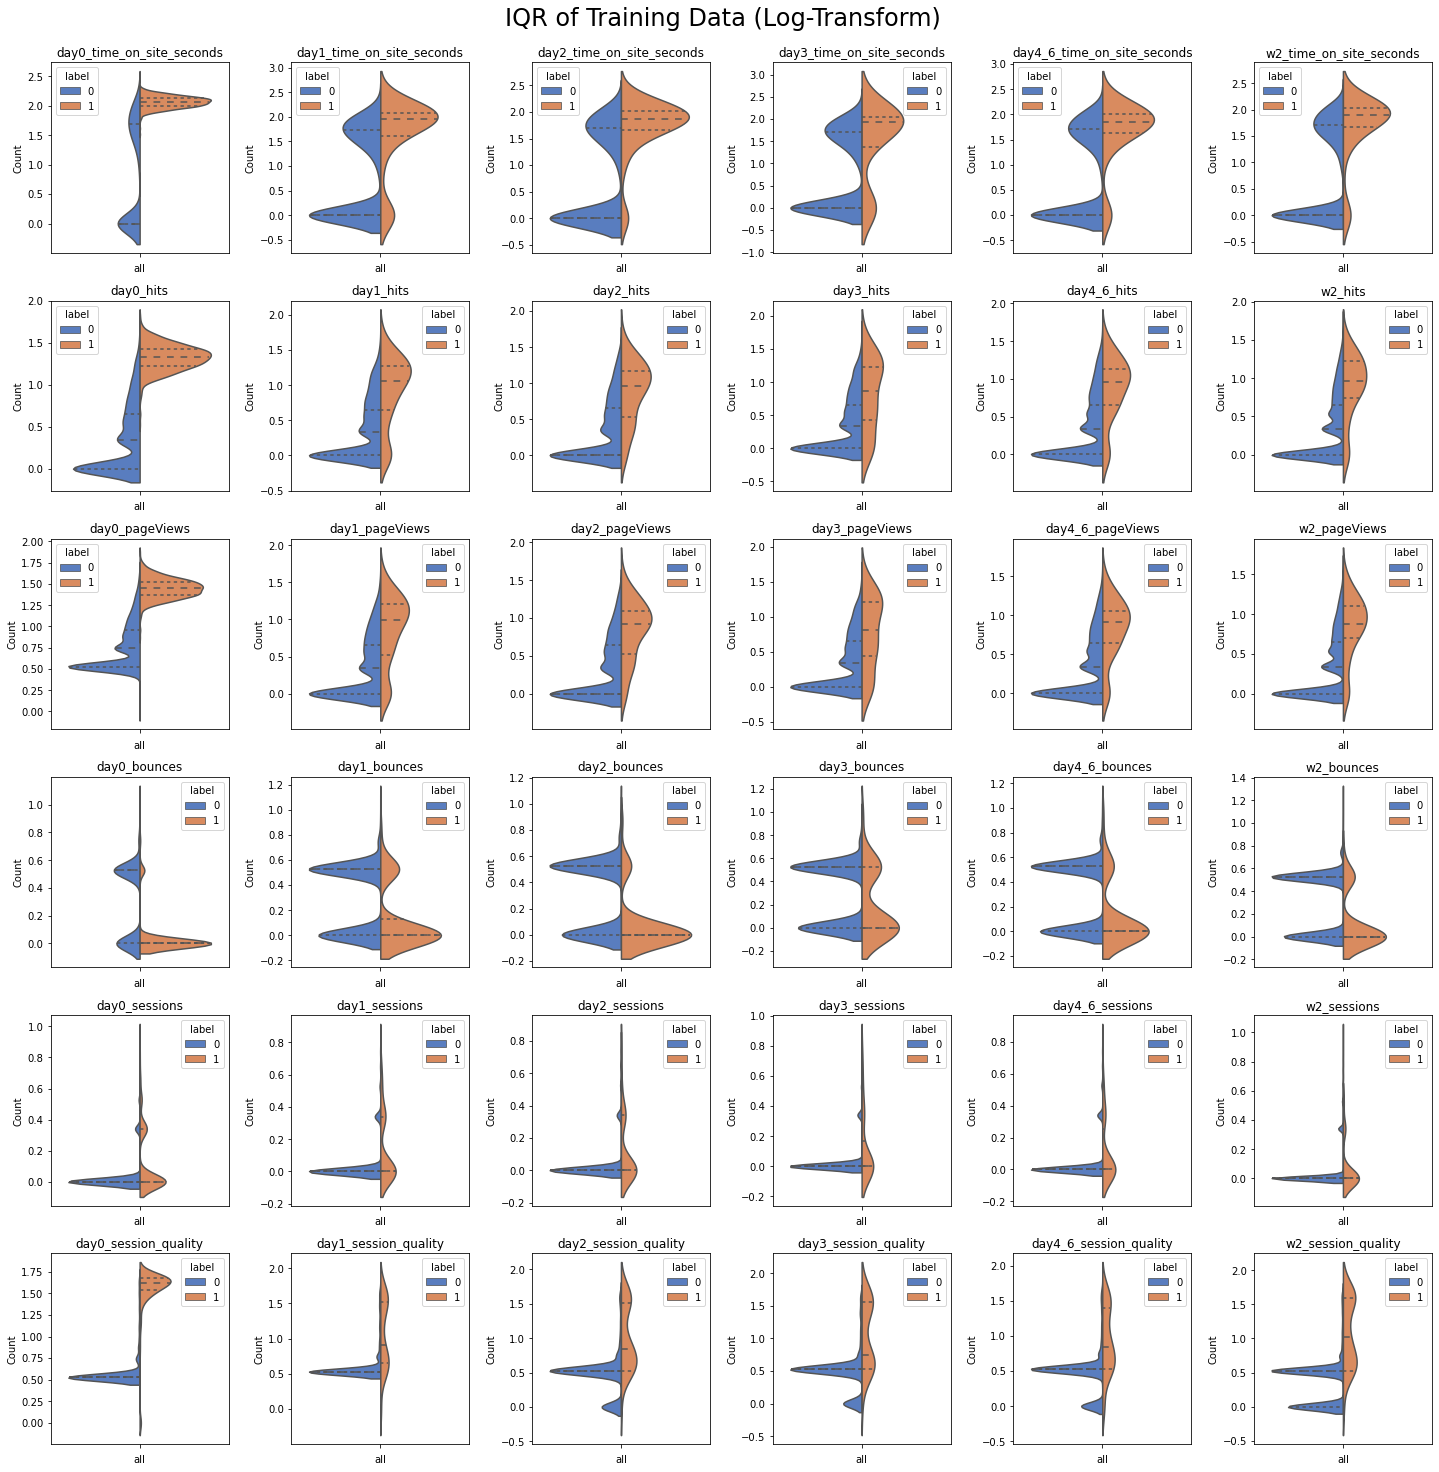

In [9]:
#create blank column to plot violin boxplot
train_log['all']=''

plot_violin(train_log, 'IQR of Training Data (Log-Transform)')

#remove blank column
train_log = train_log.iloc[:,:-1]

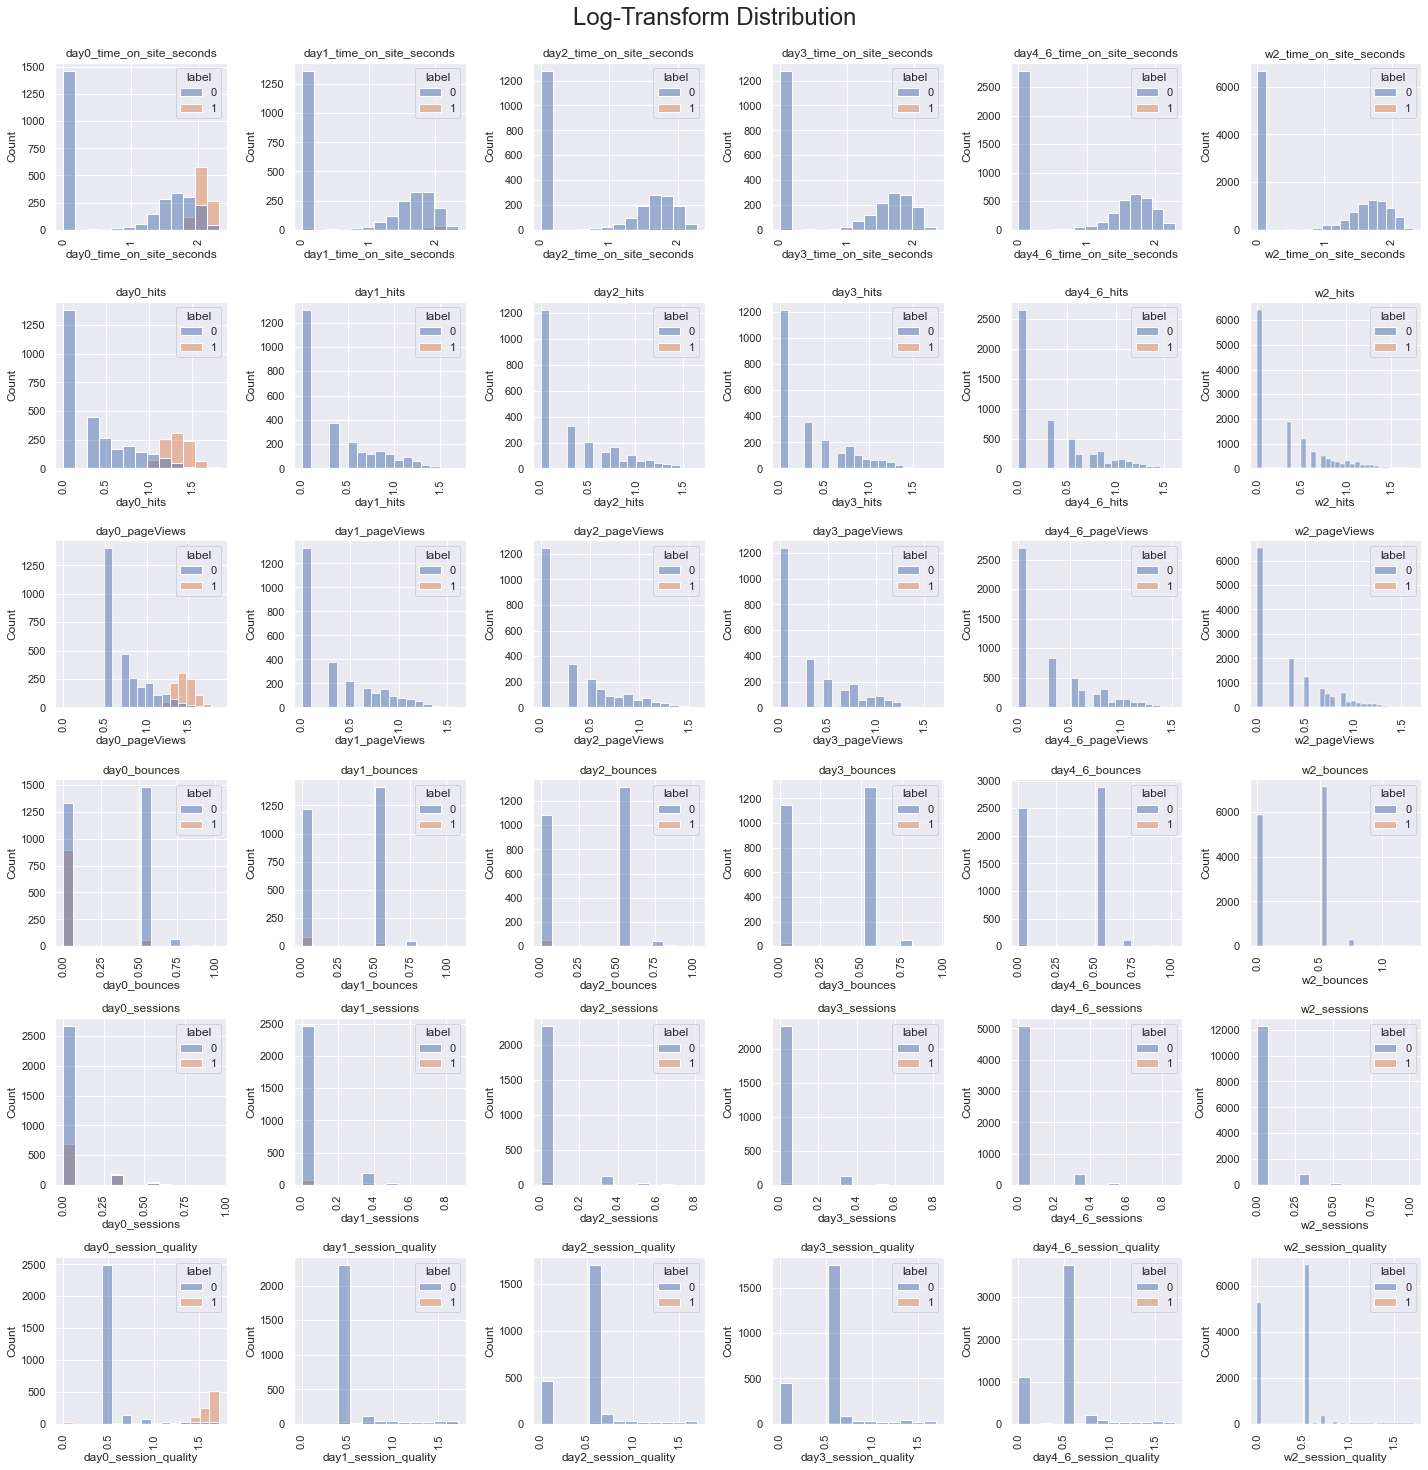

In [10]:
plot_hists(train_log, 'Log-Transform Distribution')

Based off both the violin boxplot and the histogram, we can see that most of the features have been transformed and even reducing any significantly large or small outliers. The data is still imbalanced, however.

### SCALE THE DATA

#### STANDARDIZATION

In [11]:
scaler = StandardScaler()

#Create a new dataframe, whilst setting the index to 'visitor_id'
train_scale = train.set_index('visitor_id')

#Save the column names (using the `columns` attribute)
train_scale_columns = train_scale.iloc[:,:-1].columns

#Fit to scaler, except for labels
scaler.fit((train_scale.iloc[:,:-1]))

#Transform the data
scaled = scaler.transform(train_scale.iloc[:,:-1])

#Create a new dataframe using the column names
train_scaled = pd.DataFrame(scaled, columns=train_scale_columns)

#insert visitor_id and labels
train_scaled.insert(0, 'visitor_id', train.visitor_id)
train_scaled['label'] = train['label']

Let's confirm that the data has been normalized

In [12]:
train_scaled.describe().T[['mean', 'std']]

mean       std
day0_time_on_site_seconds    5.314037e-15  1.000130
day1_time_on_site_seconds   -7.738056e-16  1.000179
day2_time_on_site_seconds    1.440034e-15  1.000200
day3_time_on_site_seconds    1.725406e-16  1.000198
day4_6_time_on_site_seconds -1.300795e-15  1.000090
w2_time_on_site_seconds      8.487496e-17  1.000037
day0_hits                    4.182848e-15  1.000130
day1_hits                   -5.540013e-16  1.000179
day2_hits                   -4.715347e-16  1.000200
day3_hits                    2.964103e-16  1.000198
day4_6_hits                 -2.906313e-16  1.000090
w2_hits                     -6.708131e-16  1.000037
day0_pageViews              -5.813825e-15  1.000130
day1_pageViews               4.386769e-16  1.000179
day2_pageViews               1.710124e-15  1.000200
day3_pageViews              -4.512802e-16  1.000198
day4_6_pageViews             1.792303e-16  1.000090
w2_pageViews                -3.254828e-16  1.000037
day0_bounces                 1.294079e-15  1.000130
day1_bounces                -1.708950e-17  1.000179
day2_bounces                -7.833585e-16  1.000200
day3_bounces                 6.442977e-16  1.000198
day4_6_bounces               6.944774e-16  1.000090
w2_bounces                   1.944927e-16  1.000037
day0_sessions               -6.919929e-15  1.000130
day1_sessions               -1.264663e-15  1.000179
day2_sessions               -7.394546e-16  1.000200
day3_sessions               -2.474982e-16  1.000198
day4_6_sessions              8.600342e-16  1.000090
w2_sessions                  1.694673e-16  1.000037
day0_session_quality         1.318974e-14  1.000130
day1_session_quality        -5.553891e-16  1.000179
day2_session_quality         1.085879e-15  1.000200
day3_session_quality        -2.346749e-15  1.000198
day4_6_session_quality      -1.190500e-15  1.000090
w2_session_quality           4.241348e-15  1.000037
label                        4.828692e-02  0.214377

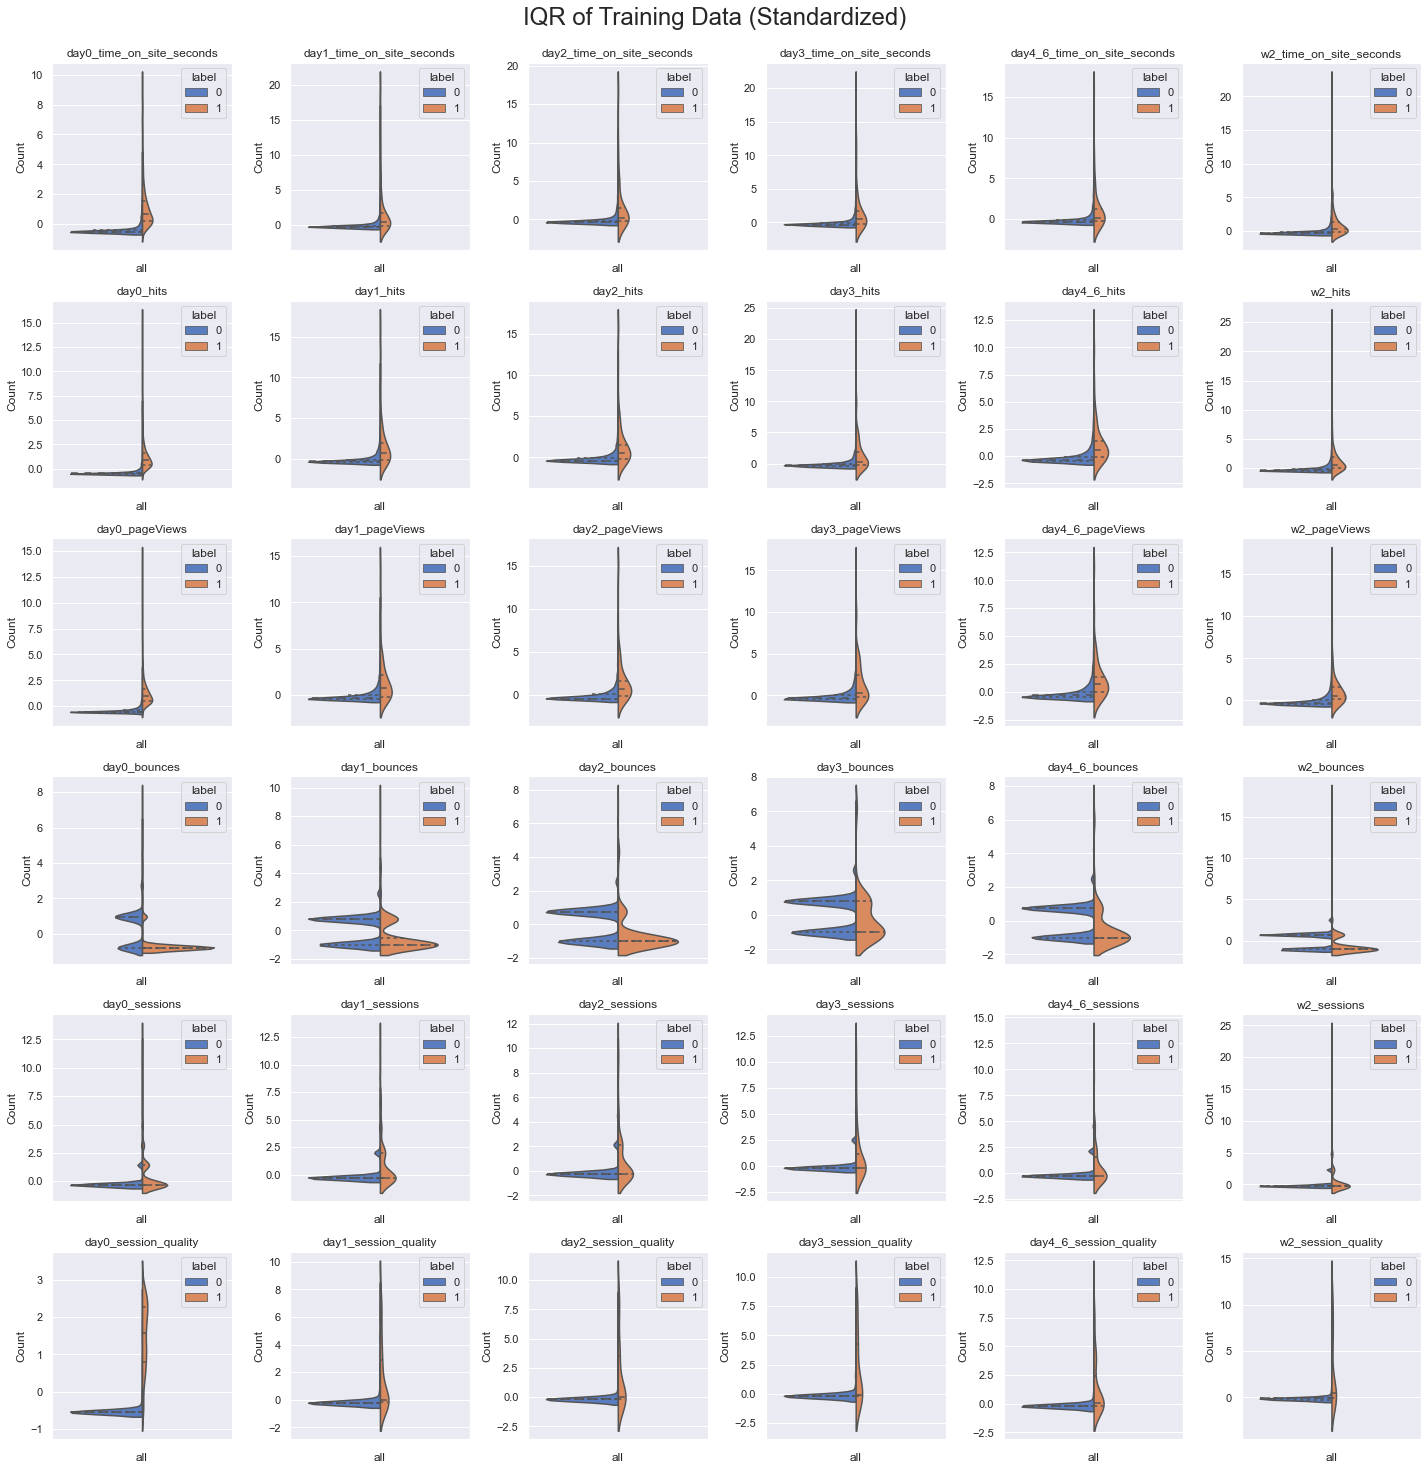

In [13]:
#create blank column to plot violin boxplot
train_scaled['all']=''
plot_violin(train_scaled, 'IQR of Training Data (Standardized)')
#remove blank column
train_scaled = train_scaled.iloc[:,:-1]

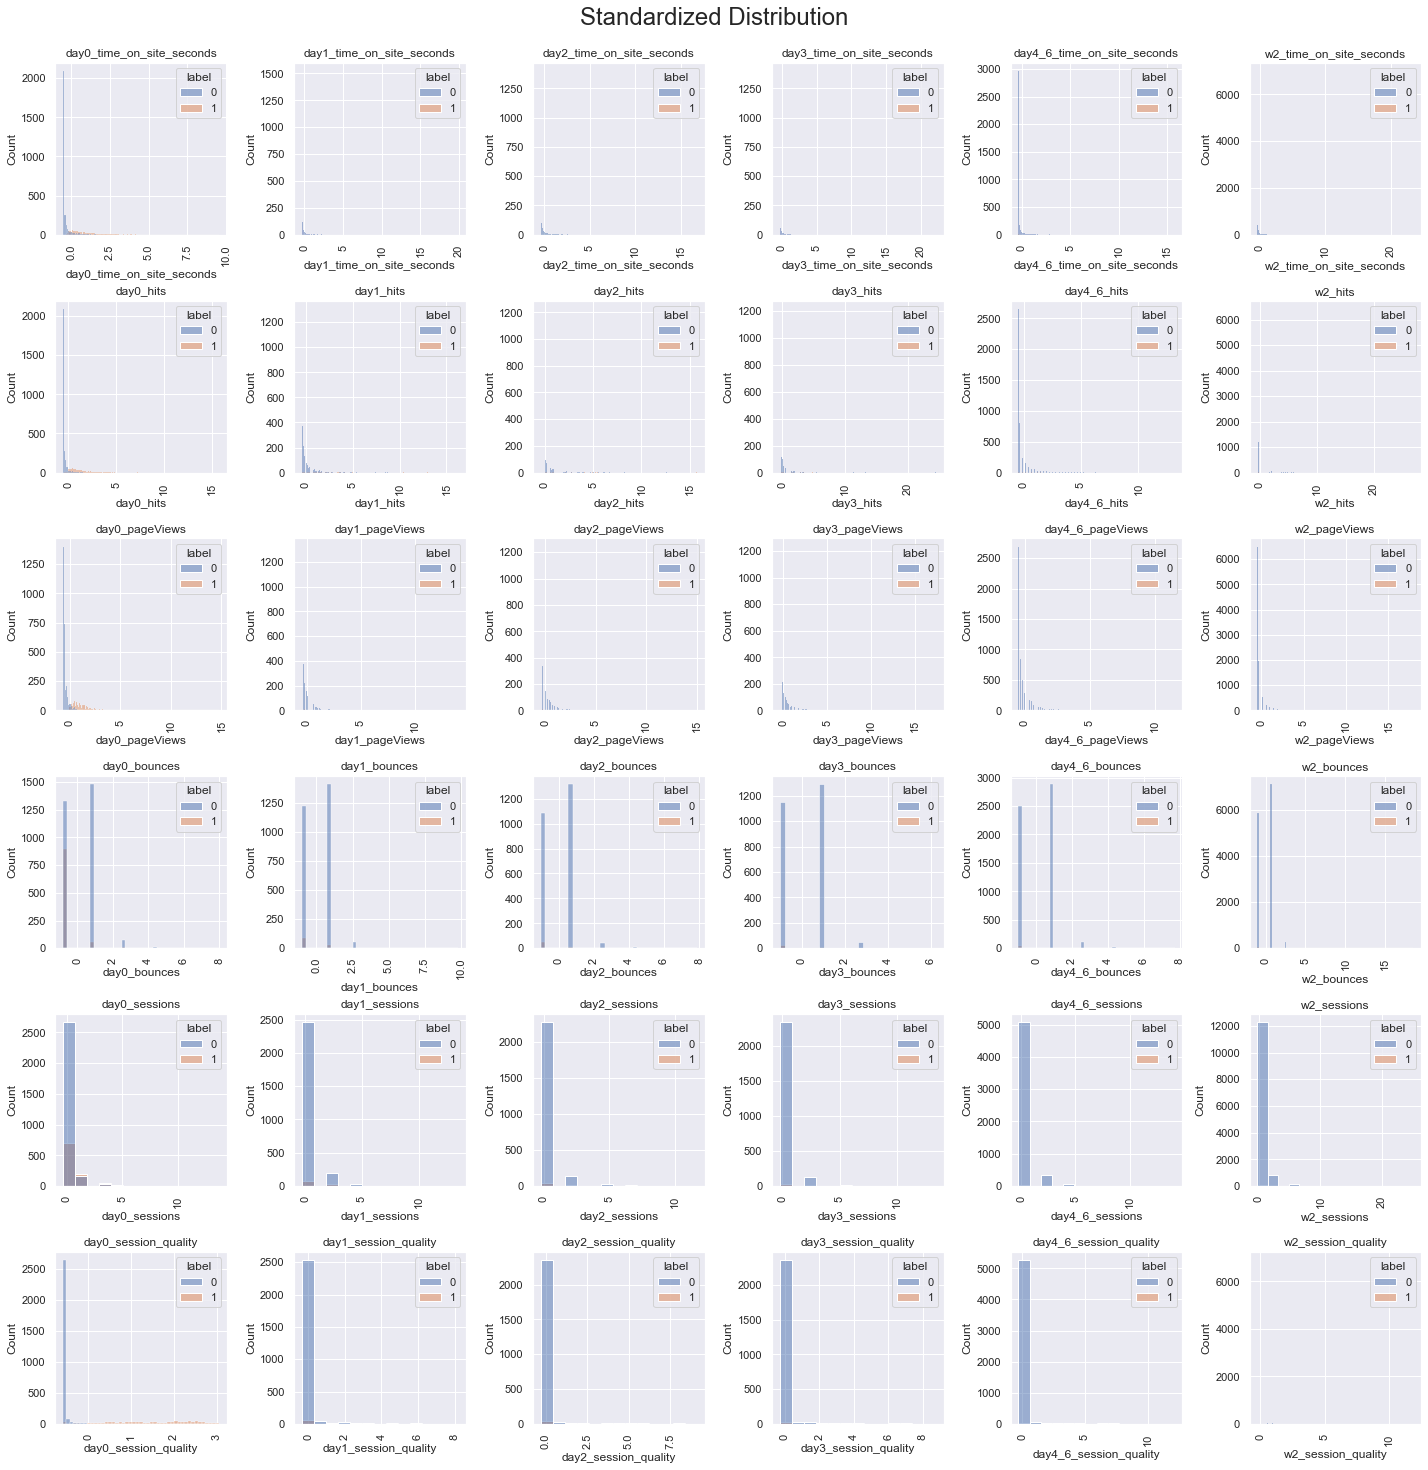

In [14]:
plot_hists(train_scaled, 'Standardized Distribution')

It looks like scaling the data down did normalize the standard deviation close to 1 and the mean close to 0. However, based off of the histogram and violin plot, it looks like we are still dealing with very large outliers and a skewed distribution.

# MODELING

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

We will be using the following models for our transformations:

- CatBoost
- Random Forest

We will be combining these in a pipeline with the transformations we examined above (__train__, __train_scaled__, and __train_log__).
First, we need to split our data.

### CATBOOST

In [123]:
def split_data(data, test_size):
    #grab all features except for the target variable
    X = data.iloc[:,:-1]
    y = data[['label']]

    #split data with random seed so we can replicate the results
    return train_test_split(X, y, test_size=test_size, random_state=42)

In [124]:
def catboost_model(X_train, X_test, y_train, y_test, iterations, type=' '):
    
    #initialize the model
    model = CatBoostClassifier(iterations=iterations)

    #get categorical features
    cat_var = np.where(X_train.dtypes != np.float)[0]
    print(f'\nCategorical Variables indices : {cat_var}')

    print(f'\nTraining{type}CatBoost Model..........')

    # fit the model with the training data
    model.fit(X_train, y_train, cat_features = cat_var, plot=False)
    print('\n Model Trained')

    # predict the target on the train dataset
    y_pred_train = model.predict(X_train)
    print(f'\nTarget on train data {y_pred_train}') 

    # Accuracy Score on train dataset
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f'\naccuracy_score on train dataset : {accuracy_train}')

    # predict the target on the test dataset
    y_pred_test = model.predict(X_test)
    print(f'\nTarget on test data {y_pred_test}') 

    # Accuracy Score on test dataset
    accuracy_test = accuracy_score(y_test,y_pred_test)
    print(f'\naccuracy_score on test dataset : {accuracy_test}')
    
    # Predict the probability score for each label
    proba_list = model.predict_proba(X_test)
    print(f'\nTarget on test data using predict_proba: {proba_list}') 
    
    return y_test, y_pred_test, proba_list

In [125]:
def lift(df):
    
    #rank the predictions made for a test set in descending order by prediction score
    df.sort_values(by='pred_score', ascending=False, inplace=True)
    
       
    #subset by predicted probability score greater than 50%
    subset = df[df.pred_score >= 0.5]
    
    #find total positive true test predictions / total negative test predictions
    percent_pos = (len(df.y_pred[df.y_pred == 1]))/(len(df.y_pred[df.y_pred == 0]))
    
    #split data into deciles or groups of 10
    rows = []
    for group in np.array_split(subset, 10):
        score = accuracy_score(group.y_test.tolist(),
                               group.y_pred.tolist(),
                               normalize=False)
        group_percent_pos = len(group.y_test[group.y_test==1])/len(group.y_test[group.y_test==0])
        rows.append({'NumCases': len(group), 'NumCorrectPredictions': score, 
                     'Lift': group_percent_pos/percent_pos,'Gain': score/len(subset)})

    lift = pd.DataFrame(rows)

    #Cumulative Calculations
    lift['RunningTotalCorrect'] = lift.NumCorrectPredictions.cumsum()
    lift['CumulativeLift'] = lift.Lift.cumsum()/percent_pos
    lift['CumulativeGain'] = lift.Gain.cumsum()

    return lift

In [134]:
def lift_other(df):
    
    #rank the predictions made for a test set in descending order by prediction score
    df.sort_values(by='proba', ascending=False, inplace=True)
    
    # split data into deciles or groups of 10
    cuts = 10
    df['ntile'] = pd.qcut(df.proba.rank(method='first') ,q=cuts, labels=range(1, cuts+1))
    
    # calculate per decile counts for positives and negatives rows
    df_new = df.copy(deep=True)
    df_new['proba'] = df.groupby(['ntile','label']).proba.transform('count')#.reset_index(name='count')
    df_new.rename(columns={'proba' : 'count'}, inplace=True)
    df_new.reset_index(inplace=True)
    
    # then go from row to columns wise, use pivot, two dfs and then join them.
    col = ['label','ntile', 'count']
    df_pos=df_new[df_new.label==1][col]
    df_neg=df_new[df_new.label==0][col]
    df_final = pd.merge(df_neg,df_pos, on='ntile',how='left', suffixes=('_neg','_pos'))
    print(df_final.head())
    
    # calculate lift 
    df_final['lift'] = df_final.count_pos/df_final.count_neg / (df_final.label_pos.sum()/df_final.label_neg.sum())
    
    return df_final

In [135]:
lift_test = lift_other(df)
lift_test

   label_neg ntile  count_neg  label_pos  count_pos
0          0    10        336        1.0      263.0
1          0    10        336        1.0      263.0
2          0    10        336        1.0      263.0
3          0    10        336        1.0      263.0
4          0    10        336        1.0      263.0


<ipython-input-134-10b1280c1cea>:24: RuntimeWarning: divide by zero encountered in double_scalars
  df_final['lift'] = df_final.count_pos/df_final.count_neg / (df_final.label_pos.sum()/df_final.label_neg.sum())


label_neg ntile  count_neg  label_pos  count_pos  lift
0              0    10        336        1.0      263.0   0.0
1              0    10        336        1.0      263.0   0.0
2              0    10        336        1.0      263.0   0.0
3              0    10        336        1.0      263.0   0.0
4              0    10        336        1.0      263.0   0.0
...          ...   ...        ...        ...        ...   ...
93754          0     1        599        NaN        NaN   NaN
93755          0     1        599        NaN        NaN   NaN
93756          0     1        599        NaN        NaN   NaN
93757          0     1        599        NaN        NaN   NaN
93758          0     1        599        NaN        NaN   NaN

[93759 rows x 6 columns]

In [ ]:
from sklearn.metrics import roc_curve

def plot_roc(y_test, y_pred, Model, Label='No Transformation'):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure(figsize=(10,10))
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label='CatBoost')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{Model} - {Label} - ROC Curve')
    plt.show()
    
    return None

In [30]:
test_size = 0.3
iterations = 50

In [31]:
X_train, X_test, y_train, y_test = split_data(train, test_size)
y_test, y_pred_test, proba_list = catboost_model(X_train, X_test, y_train, y_test, iterations)


Categorical Variables indices : [0]

Training CatBoost Model..........
Learning rate set to 0.495485
0:	learn: 0.0853830	total: 60.3ms	remaining: 2.96s
1:	learn: 0.0240110	total: 91.1ms	remaining: 2.19s
2:	learn: 0.0173443	total: 116ms	remaining: 1.81s
3:	learn: 0.0145024	total: 142ms	remaining: 1.64s
4:	learn: 0.0139500	total: 170ms	remaining: 1.53s
5:	learn: 0.0127261	total: 197ms	remaining: 1.44s
6:	learn: 0.0123277	total: 223ms	remaining: 1.37s
7:	learn: 0.0122001	total: 248ms	remaining: 1.3s
8:	learn: 0.0116912	total: 274ms	remaining: 1.25s
9:	learn: 0.0116240	total: 303ms	remaining: 1.21s
10:	learn: 0.0113680	total: 329ms	remaining: 1.17s
11:	learn: 0.0109825	total: 355ms	remaining: 1.12s
12:	learn: 0.0109357	total: 384ms	remaining: 1.09s
13:	learn: 0.0097667	total: 411ms	remaining: 1.05s
14:	learn: 0.0095300	total: 436ms	remaining: 1.02s
15:	learn: 0.0094903	total: 463ms	remaining: 985ms
16:	learn: 0.0090718	total: 492ms	remaining: 956ms
17:	learn: 0.0089733	total: 519ms	remain

In [34]:
df = X_test.copy(deep=True)
df['label'] = y_test
#df['y_pred'] = y_pred_test
df['proba'] = proba_list[:, 1]

In [27]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test, proba_list)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [ ]:
df.head().T

In [ ]:
plot_roc(y_test, y_pred_test)

In [ ]:
X_train, X_test, y_train, y_test = split_data(train_log, test_size)
y_test, y_pred_test, proba_list = catboost_model(X_train, X_test, y_train, y_test, iterations, type = ' Log-Transform ')

In [ ]:
df = X_test.copy(deep=True)
df['y_test'] = y_test
df['y_pred'] = y_pred_test
df['pred_score'] = proba_list[:, 1]

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, proba_list)
plt.show()

In [ ]:
lift_test = lift(df)
lift_test

In [ ]:
plot_roc(y_test, y_pred_test, 'Log Transform')

In [ ]:
X_train, X_test, y_train, y_test = split_data(train_scaled, test_size)
y_test, y_pred_test, proba_list = catboost_model(X_train, X_test, y_train, y_test, iterations, type = ' Scaled ')

In [ ]:
df = X_test.copy(deep=True)
df['y_test'] = y_test
df['y_pred'] = y_pred_test
df['pred_score'] = proba_list[:, 1]

In [ ]:
skplt.metrics.plot_cumulative_gain(y_test, proba_list)
plt.show()

In [ ]:
lift_test = lift(df)
lift_test

In [ ]:
plot_roc(y_test, y_pred_test, 'Scaled')

As assumed there were no differences between scaling and not scaling the data. The log transformation performs slightly worse.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cf_matrix, annot=True, fmt='')
plt.show()

### IMPUTE MISSING DATA

The null values in the data are valuable in and of itself. They represent the days that each visitor was _not_ present on the site. We can impute the data by filling each null value with zeroes.

However, we can also try and see if imputing the data by the mean or median will improve the model.

In [ ]:
train_median = dict(round(train.iloc[:, 1:-1].median(),2))
train_mean = dict(round(train.iloc[:, 1:-1].mean(),2))

In [ ]:
train_0= train.copy(deep=True)
train_0.fillna(0, inplace=True)

In [ ]:
train_med= train.copy(deep=True)
train_med.fillna(train_median, inplace=True)

In [ ]:
train_avg= train.copy(deep=True)
train_avg.fillna(train_mean, inplace=True)

### RANDOM FOREST

In [ ]:
estimators = 100

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
def random_forest(X_train, X_test, y_train, y_test, estimators, type=' '):
    
    # Initialize classifier 
    model = RandomForestClassifier(n_estimators=estimators, max_features="auto", random_state=42)
    
    # Fit a Random Forest model
    model.fit(X_train, y_train)
    
    # Predict target on the test dataset
    y_pred = model.predict(X_test)
    
    # Accuracy score on test dataset
    accuracy_score(y_test, y_pred)
    
    # Predict the probability score for each label
    proba_list = model.predict_proba(X_test)
    
    return y_test, y_pred, proba_list

In [ ]:
X_train, X_test, y_train, y_test = split_data(train_0, test_size)
y_test, y_pred, proba_list = random_forest(X_train, X_test, y_train, y_test, estimators)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='')
plt.show()

In [ ]:
df = X_test.copy(deep=True)
df['y_test'] = y_test
df['y_pred'] = y_pred_test
df['pred_score'] = proba_list[:, 1]

lift_test = lift(df)
plot_roc(y_test, y_pred, 'Random Forest', '0 Imputed')
lift_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(train_avg, test_size)
y_test, y_pred, proba_list = random_forest(X_train, X_test, y_train, y_test, estimators)

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='')
plt.show()

In [ ]:
df = X_test.copy(deep=True)
df['y_test'] = y_test
df['y_pred'] = y_pred_test
df['pred_score'] = proba_list[:, 1]

lift_test = lift(df)
plot_roc(y_test, y_pred, 'Random Forest', 'Mean Imputed')
lift_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(train_med, test_size)
y_test, y_pred, proba_list = random_forest(X_train, X_test, y_train, y_test, estimators)

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='')
plt.show()

In [ ]:
df = X_test.copy(deep=True)
df['y_test'] = y_test
df['y_pred'] = y_pred_test
df['pred_score'] = proba_list[:, 1]

lift_test = lift(df)
plot_roc(y_test, y_pred, 'Random Forest', 'Median Imputed')
lift_test

In [ ]:
.#Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
#Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
#Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)